In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from PIL import ImageFont
import warnings 
warnings.filterwarnings('ignore')

In [13]:
# Importing the CIFAR-10 dataset from Keras 
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [14]:
print('Shape of the Dataset')
print('==================================')
print('X_train Shape: {}'.format(X_train.shape))
print('-------------------------------------')
print('X_test Shape: {}'.format(X_test.shape))
print('-------------------------------------')
print('Y_train Shape: {}'.format(Y_train.shape))
print('-------------------------------------')
print('Y_test Shape: {}'.format(Y_test.shape))

Shape of the Dataset
X_train Shape: (50000, 32, 32, 3)
-------------------------------------
X_test Shape: (10000, 32, 32, 3)
-------------------------------------
Y_train Shape: (50000, 1)
-------------------------------------
Y_test Shape: (10000, 1)


In [15]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

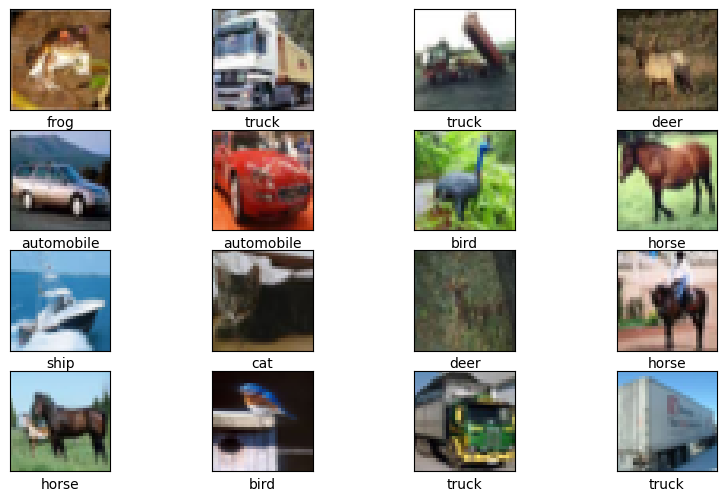

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [17]:
# Model_3 with Batch Normalization
model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
#Defining the callback function to stop our training once the acceptable accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    
callbacks = myCallback()

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
datagen = ImageDataGenerator(
    rotation_range=15,  # Döndürme açısı derecesi
    width_shift_range=0.1,  # Yatay kaydırma aralığı
    height_shift_range=0.1,  # Dikey kaydırma aralığı
    shear_range=0.1,  # Rastgele şekil bükme aralığı
    zoom_range=0.1,  # Yakınlaştırma aralığı
    horizontal_flip=True,  # Yatay yansıtma
    fill_mode='nearest'  # Döndürme veya kaydırma sonrası oluşacak boşlukların doldurulma yöntemi
)

In [21]:
# Model eğitim verisini oluşturma
training_flow = datagen.flow(X_train, Y_train_en)
validation_flow = datagen.flow(X_test, Y_test_en)

In [22]:
#Compiling and model training with batch size = 32, epochs = 50, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
batch_size = 32
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_flow, steps_per_epoch=len(X_train) // batch_size, validation_data=validation_flow, batch_size = 32, epochs = 25, callbacks=[callbacks])

Epoch 1/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 318s 200ms/step - accuracy: 0.3035 - loss: 2.2084 - val_accuracy: 0.5287 - val_loss: 1.3186
Epoch 2/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5312 - loss: 0.6845 - val_accuracy: 0.5176 - val_loss: 1.3364
Epoch 3/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 311s 199ms/step - accuracy: 0.5399 - loss: 1.2963 - val_accuracy: 0.5275 - val_loss: 1.3213
Epoch 4/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6250 - loss: 0.4693 - val_accuracy: 0.5366 - val_loss: 1.2959
Epoch 5/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 319s 204ms/step - accuracy: 0.6398 - loss: 1.0316 - val_accuracy: 0.6774 - val_loss: 0.9064
Epoch 6/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6250 - loss: 0.4525 - val_accuracy: 0.6724 - val_loss: 0.9254
Epoch 7/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 338s 216ms/step - accuracy: 0.7035 - loss: 0.8630 - val_accuracy: 0.6341 - val_loss: 1.0923
Epoch 8/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0

In [23]:
evaluation = model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model (with Batch Normalization): {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.8458 - loss: 0.4632
Test Accuracy of Model (with Batch Normalization): 0.8457000255584717


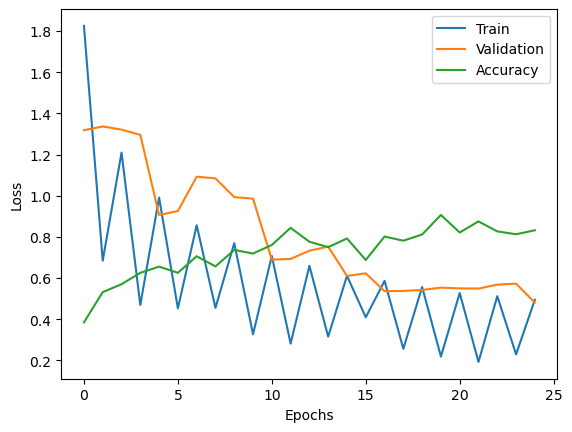

In [24]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history)

In [25]:
import os
from PIL import Image

In [26]:
# PNG resimlerinin bulunduğu dizin
png_dir = r'C:\Users\Canip\Desktop\cifar-10\test\test'

# Tüm PNG dosyalarını yükleme ve bir NumPy dizisine dönüştürme
image_list = []
for filename in os.listdir(png_dir):
    if filename.endswith('.png'):
        img = Image.open(os.path.join(png_dir, filename))
        img_array = np.array(img)
        image_list.append(img_array)

Real_Test = np.array(image_list)

In [ ]:
print('Real_Test Shape: {}'.format(Real_Test.shape))

Real_Test Shape: (300000, 32, 32, 3)


In [ ]:
results = model.predict(Real_Test)

9375/9375 ━━━━━━━━━━━━━━━━━━━━ 495s 53ms/step


In [ ]:
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="label")

In [ ]:
print(results)

0         8
1         5
2         5
3         9
4         5
         ..
299995    5
299996    1
299997    5
299998    5
299999    5
Name: label, Length: 300000, dtype: int64


In [ ]:
submission = pd.concat([pd.Series(range(1,300001),name = "id"),results],axis = 1)

In [ ]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Sınıf adları
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Etiketleri sınıf adlarına dönüştürme
label_to_class = dict(zip(labels, class_names))

# Örnek etiketleri sınıf adlarına dönüştürme
real_sub = [label_to_class[label] for label in submission]

print(real_sub)

In [ ]:
real_sub.to_csv('submission-cifar10.csv', index=False)